In [6]:
import matplotlib.pyplot as plt
import os
import cv2
from frame_helpers import colorize, convert_to_bgra_if_required
from pyk4a import PyK4APlayback

In [7]:
# print mkv recording length
def info(playback: PyK4APlayback):
    print(f"Record length: {playback.length / 1000000: 0.2f} sec")

Record length:  10.20 sec


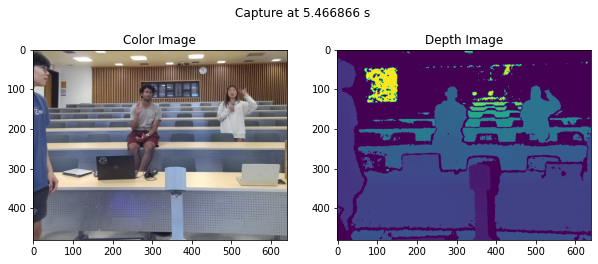

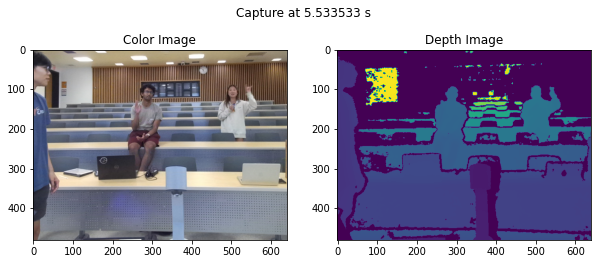

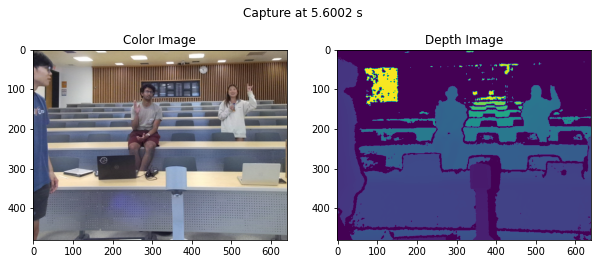

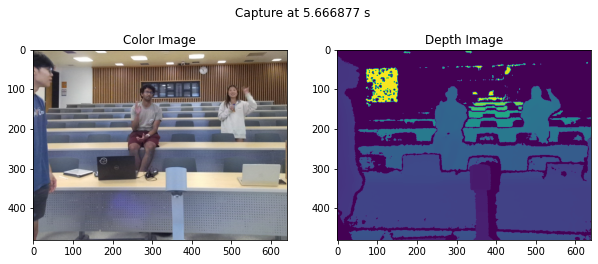

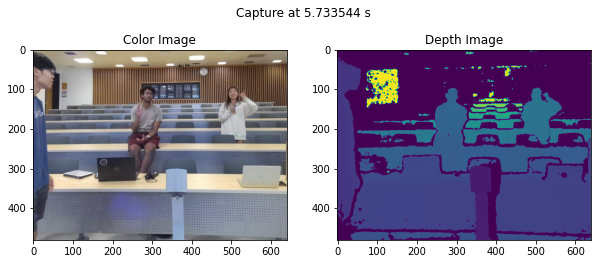

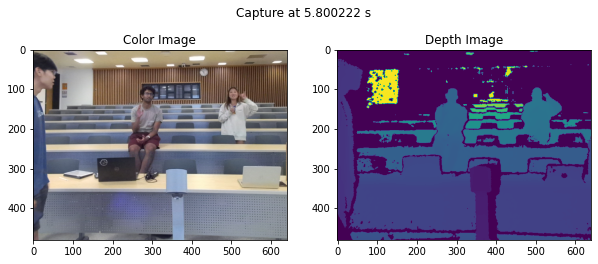

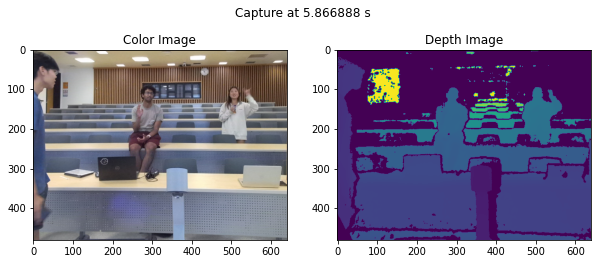

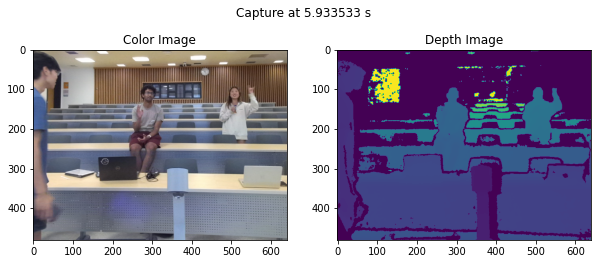

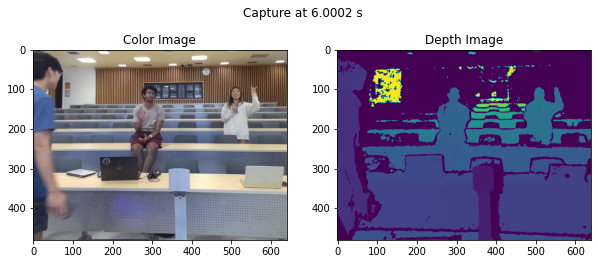

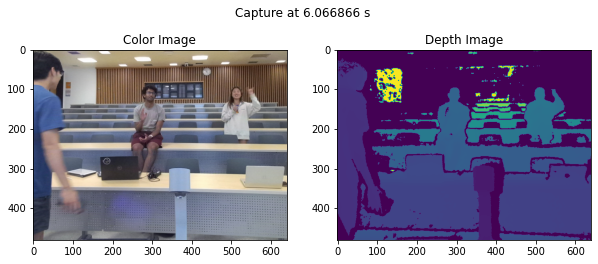

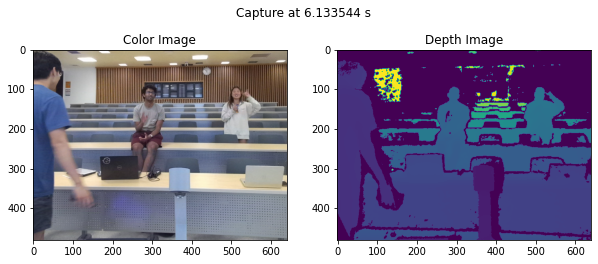

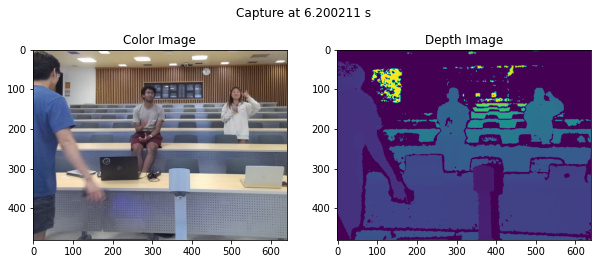

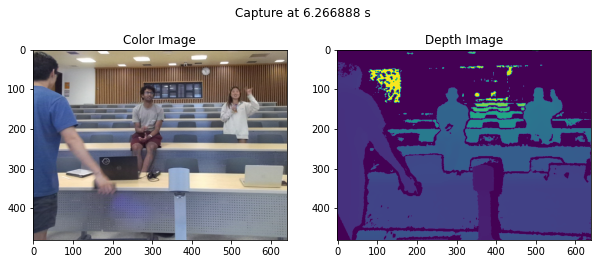

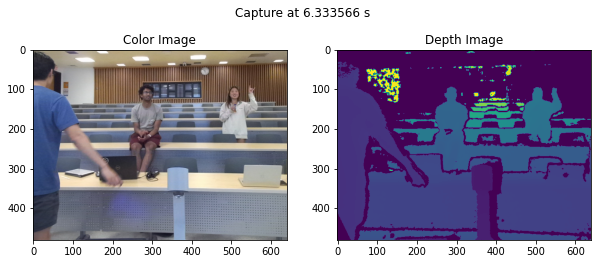

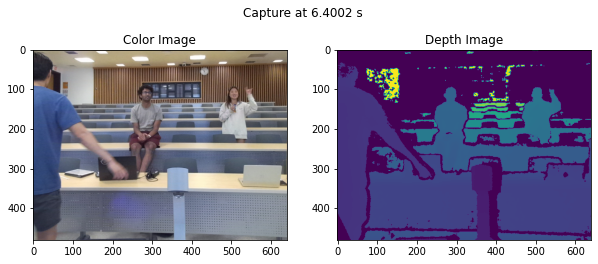

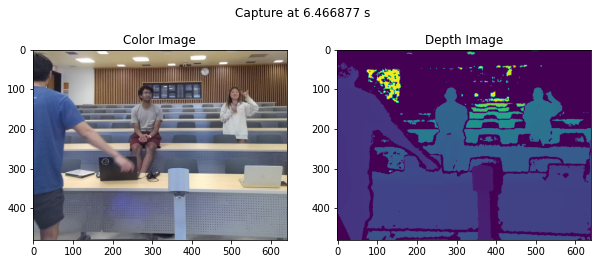

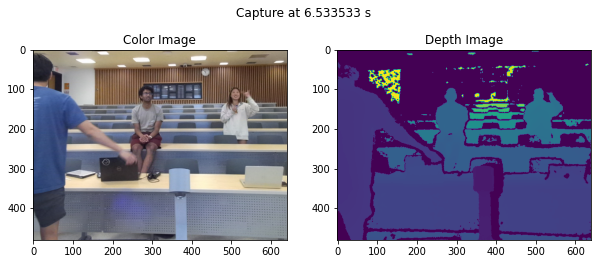

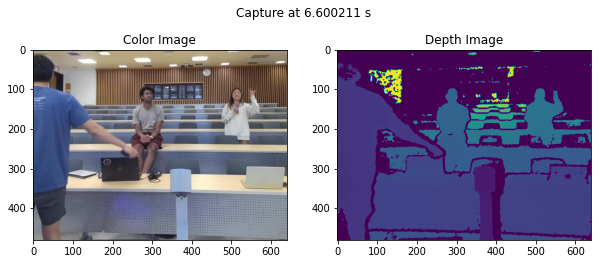

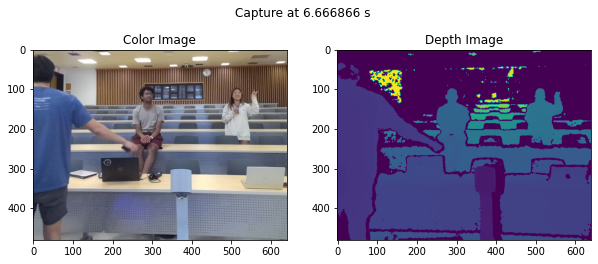

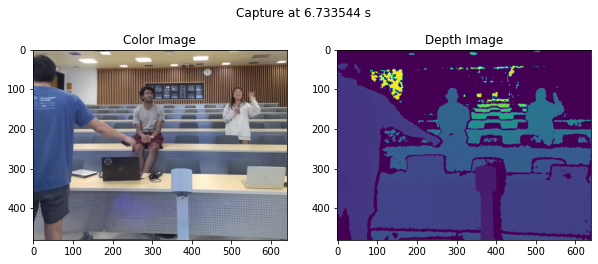

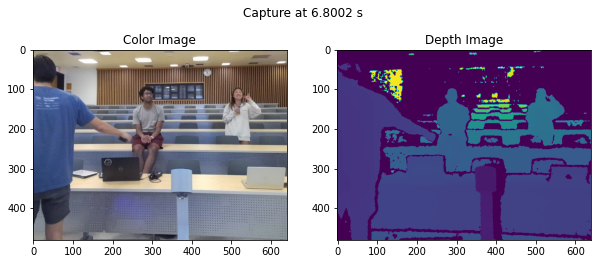

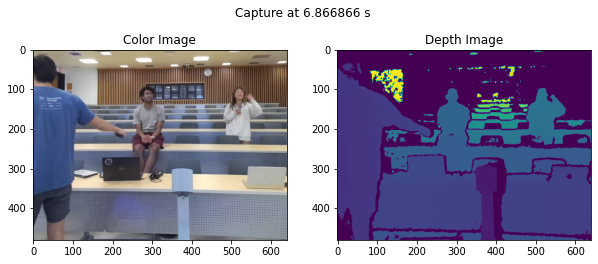

KeyboardInterrupt: 

In [8]:
# Load an MKV file
if os.path.exists("C:/Users/tiani/SeniorDesign/ecj1204_2023-11-7.mkv"):
    mkv_file = "C:/Users/tiani/SeniorDesign/ecj1204_2023-11-7.mkv"
else:
    print("That path doesn't exist bruh lol")
    exit()

playback = PyK4APlayback(mkv_file)
playback.open()
playback.seek(5000000) # in microseconds, aka 5 seconds
info(playback) # prints the recording length

# print(type(playback))

while True:
    try:
        capture = playback.get_next_capture()
      
        plt.figure(figsize=(10,4))

        if capture.color is None:
            print("No capture color")
        if capture.color is not None:
            # shows the original RGB photo, not cropped 
            # plt.imshow(cv2.cvtColor(convert_to_bgra_if_required(0, capture.color), cv2.COLOR_BGR2RGB))
            # plt.show()

            plt.subplot(1,2,1)
            img_color = cv2.resize(cv2.cvtColor(convert_to_bgra_if_required(0, capture.color), cv2.COLOR_BGR2RGB)[240:720, 286: 926, 0:3], (640, 480))
            plt.imshow(img_color)
            plt.title ("Color Image")

        if capture.depth is None:
            print("No capture depth")
        if capture.depth is not None:
            # shows the original depth photo, not cropped 
            # plt.imshow(center_crop(cv2.cvtColor(colorize(capture.depth, (None, 5000)), cv2.COLOR_BGR2RGB), (480,640)))
            # plt.show()

            plt.subplot(1,2,2)
            # transformed frame aligns the depth frame with the color frame. It is able do this through the capture
            img_depth = cv2.resize(capture.transformed_depth[240:720, 286: 926], (640, 480))
            plt.imshow(img_depth)
            plt.title("Depth Image")

        plt.suptitle("Capture at {} s".format(float(capture.color_timestamp_usec / 1000000)))
        plt.show()

        # does not wait for a key press to get the next capture. 
        key = cv2.waitKey(0)
        if key != -1:
            break
    except EOFError:
        break  

# Release OpenCV windows
cv2.destroyAllWindows()
playback.close()
